# EJERCICIO LIBERTAD DE PRENSA

![](https://cnnespanol.cnn.com/wp-content/uploads/2018/01/libertad-prensa.jpeg?quality=100&strip=info)

Comparar el grado de libertad de prensa del que gozan los periodistas y los medios en 180 países o territorios: ése es el objetivo de la Clasificación Mundial de la Libertad de Prensa. Este análisis se basa en la definición de la libertad de prensa elaborada por RSF y su panel de expertos, en el marco de la revisión metodológica de 2022:



**La libertad de prensa es la posibilidad efectiva para los periodistas, como individuos y como colectivo, de seleccionar, producir y difundir informaciones, en aras del interés general, independientemente de las interferencias políticas, económicas, legales y sociales, y sin menoscabo para su seguridad física y mental.**

Para saber mas sobre la metodologia de medicion: https://rsf.org/es/clasificacion

Link del dataset: https://raw.githubusercontent.com/riverofacundo/cursos/main/libertad_prensa.csv

Columnas del dataset:

- ``codigo_iso``: Código ISO del país
- ``pais``: País
- ``anio``: Año del resultado
- ``indice``: Puntaje Índice Libertad de Prensa (menor puntaje = mayor libertad de prensa)
- ``ranking``: Ranking Libertad de Prensa

📰 Importar Pandas

In [13]:
import pandas as pd


📰 Leer el .csv

In [14]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/riverofacundo/cursos/main/libertad_prensa.csv')


📰 Imprimir los primeros 5 registros del dataframe

In [15]:
print(df.head())


  codigo_iso         pais  anio  indice  ranking
0        AFG  Afghanistán  2001   35.50     59.0
1        AFG  Afghanistán  2002   40.17     78.0
2        AFG  Afghanistán  2003   28.25     49.0
3        AFG  Afghanistán  2004   39.17     62.0
4        AFG  Afghanistán  2005   44.25     67.0


📰 Solo vamos a utilizar lo valores del 2017 para arriba (incluyendo 2017)

In [16]:
df = df[df['anio'] >= 2017]


In [17]:
print(df)


     codigo_iso         pais  anio  indice  ranking
14          AFG  Afghanistán  2017   39.46    120.0
15          AFG  Afghanistán  2018   37.28    118.0
16          AFG  Afghanistán  2019   36.55    121.0
31          AGO       Angola  2017   40.42    125.0
32          AGO       Angola  2018   38.35    121.0
...         ...          ...   ...     ...      ...
3041        ZMB       Zambia  2018   35.36    113.0
3042        ZMB       Zambia  2019   36.38    119.0
3057        ZWE     Zimbabue  2017   41.44    128.0
3058        ZWE     Zimbabue  2018   40.53    126.0
3059        ZWE     Zimbabue  2019   42.23    127.0

[540 rows x 5 columns]


📰 Imprimir la cantidad de filas y columnas del df

In [18]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])


Filas: 540
Columnas: 5


📰 Utiliza un metodo perteneciente a los df para imprimir las columnas, la cantidad de no-nulos de cada una y el tipo de dato

In [19]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 14 to 3059
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codigo_iso  540 non-null    object 
 1   pais        540 non-null    object 
 2   anio        540 non-null    int64  
 3   indice      531 non-null    float64
 4   ranking     530 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 25.3+ KB
None


📰 Utiliza un metodo perteneciente a los df para imprimir informacion estadistica del df.

Tiendo en cuenta esta clasificacion:

| Puntaje | Situación      |
|---------|----------------|
| 0-15    | Buena          |
| 15-30   | Mas bien buena |
| 30-45   | Problematica   |
| 45-60   | Dificil        |
| 60-100  | Muy grave      |

- ¿Como es la dispersion?
- ¿En que situación se encuentra el promedio del mundo?
- El 25% de los paises se encuentra en que tipo de situación?
- Que puntaje tiene el peor pais?


In [20]:
print(df['indice'].describe())

print("La dispersion es:", df['indice'].std())

print("El promedio del mundo es:", df['indice'].mean())

print("El 25% de los paises se encuentra en la situacion:", df['indice'].quantile(0.25))

print("El peor pais tiene un puntaje de:", df['indice'].max())


count    531.000000
mean      35.085782
std       16.323416
min        7.600000
25%       24.935000
50%       30.950000
75%       43.280000
max       88.870000
Name: indice, dtype: float64
La dispersion es: 16.32341624844847
El promedio del mundo es: 35.08578154425612
El 25% de los paises se encuentra en la situacion: 24.935000000000002
El peor pais tiene un puntaje de: 88.87


⚠️¿Hay nulos en el df?⚠️

Si los hay reemplazar, probá estas formas de tratarlos, al final quedate con la que te parezca mejor o si te parecen todas malas elegi la menos peor y **justifica tu elección**.(Imaginate que estos datos seran utilizados para generar un informe de la ONU)

- Borrar las filas que contienen nulos
- Reemplazar los nulos por la media
- Reemplazar los nulos por la mediana


📰 Imprimir solo las filas que contengan nulo en alguna columna

In [21]:
print(df[df.isnull().any(axis=1)])

     codigo_iso               pais  anio  indice  ranking
133         ATG  Antigua y Barbuda  2017     NaN      NaN
134         ATG  Antigua y Barbuda  2018     NaN      NaN
135         ATG  Antigua y Barbuda  2019     NaN      NaN
254         BFA       Burkina Faso  2019   24.53      NaN
1119        GRD            Granada  2017     NaN      NaN
1120        GRD            Granada  2018     NaN      NaN
1121        GRD            Granada  2019     NaN      NaN
1527        KSV             Kosovo  2017     NaN      NaN
1528        KSV             Kosovo  2018     NaN      NaN
1529        KSV             Kosovo  2019     NaN      NaN


📰 Reemplazo por la media

In [22]:
df['indice'].fillna(df['indice'].mean(), inplace=True)

📰 Elimino las filas

In [23]:
df = df.dropna()

⚠️A partir de ahora trabajaremos con el df sin nulos⚠️

📰 Ordenar el df en orden descendente tomando como referencia el Indice, ¿cual es el peor país del dataset (en cuestion de libertad de prensa)? Mostrar esta informacion de forma linda con un print

In [24]:
worst_country = df.sort_values(by='indice', ascending=False).iloc[0]
print('El peor país del dataset en cuestión de libertad de prensa es:', worst_country['pais'])

El peor país del dataset en cuestión de libertad de prensa es: Corea del Norte


📰 Ordenar el df en orden ascendente tomando como referencia el Indice, ¿cual es el mejor país del dataset (en cuestion de libertad de prensa)? Mostrar esta informacion de forma linda con un print

In [25]:
best_country = df.sort_values(by='indice', ascending=True).iloc[0]
print('El mejor país del dataset en cuestión de libertad de prensa es:', best_country['pais'])


El mejor país del dataset en cuestión de libertad de prensa es: Noruega


📰 El dataset ordenado de forma ascendente guardarlo en una variable y resetearle el indice, a partir de ahora se utilizara esta nueva variable para los siguientes puntos

In [26]:
df_sorted = df.sort_values(by='indice', ascending=True)
df_sorted = df_sorted.reset_index(drop=True)

📰 **Enriquecimiento de datos**: para hacer un analisis por continente necesitamos una nueva columna que para cada registro asigne el continente de ese pais. Para esto leemos un nuevo dataset que contiene la informacion de la region y continente de cada pais.

In [36]:
import pandas as pd

df_continentes = pd.read_csv('./TablaContinentes.csv', sep = ';', encoding= 'utf-8')

📰 "Mergeamos" ambos dataset por el codigo_iso

In [45]:
import pandas as pd
df_merged = pd.merge(df_sorted, df_continentes, on='codigo_iso', how='left')

📰 Vemos si hay algun nulo, esto quiere decir que algunos "cruces no se pudieron realizar"

In [44]:
df_merged[df_merged.isnull().any(axis=1)]

,codigo_iso,pais_x,anio,indice,ranking,No,pais_y,M49 Code,Region,Region 2,Continente
0,NOR,Noruega,2017,7.60,1.0,166.0,Norway,578.0,Northern Europe,NaN,Europe
1,NOR,Noruega,2018,7.63,1.0,166.0,Norway,578.0,Northern Europe,NaN,Europe
2,NOR,Noruega,2019,7.82,1.0,166.0,Norway,578.0,Northern Europe,NaN,Europe
3,FIN,Finlandia,2019,7.90,2.0,80.0,Finland,246.0,Northern Europe,NaN,Europe
4,SWE,Suecia,2017,8.27,2.0,217.0,Sweden,752.0,Northern Europe,NaN,Europe
...,...,...,...,...,...,...,...,...,...,...,...
523,TKM,Turkmenistan,2017,84.19,178.0,229.0,Turkmenistan,795.0,Central Asia,NaN,Asia
524,TKM,Turkmenistan,2018,84.20,178.0,229.0,Turkmenistan,795.0,Central Asia,NaN,Asia
527,PRK,Corea del Norte,2017,84.98,180.0,63.0,Democratic People's Republic of Korea,408.0,Eastern Asia,NaN,Asia
528,TKM,Turkmenistan,2019,85.44,180.0,229.0,Turkmenistan,795.0,Central Asia,NaN,Asia


📰 Sacar la mediana del indice por Continente, cual es el peor continente en terminos de libertad de prensa?

In [55]:
import pandas as pd

df_continentes = df_merged.groupby('Continente')['indice'].median().reset_index()

df_continentes = df_continentes.sort_values(by='indice', ascending=True)

worst_continent = df_continentes.iloc[-1]['Continente']

print('El peor continente en términos de libertad de prensa es:', worst_continent)


El peor continente en términos de libertad de prensa es: Asia


📰 Sacar la mediana del indice por Region, cual es la peor region en terminos de libertad de prensa?

In [56]:
df_regiones = df_merged.groupby('Region')['indice'].median().reset_index()

df_regiones = df_regiones.sort_values(by='indice', ascending=True)

worst_region = df_regiones.iloc[-1]['Region']

print('La peor región en términos de libertad de prensa es:', worst_region)


La peor región en términos de libertad de prensa es: Central Asia


📰  ¿Que paises constituyen la peor region?

![](https://upload.wikimedia.org/wikipedia/commons/a/a3/Central_Asia.svg)

In [58]:
worst_region_countries = df_merged[df_merged['Region'] == worst_region]['pais_x']

print('Los países que constituyen la peor región son:')
print(worst_region_countries)

Los países que constituyen la peor región son:
227      Kirguistán
263      Kirguistán
266      Kirguistán
434      Tajikistan
436      Tajikistan
456      Kazakhstan
461      Uzbekistan
463      Kazakhstan
464      Tajikistan
467      Kazakhstan
484      Uzbekistan
499      Uzbekistan
523    Turkmenistan
524    Turkmenistan
528    Turkmenistan
Name: pais_x, dtype: object


📰 Hace algun grafico que muestre algun dato interesante

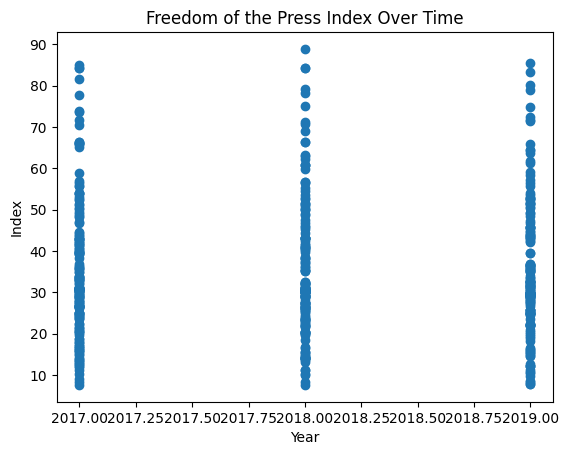

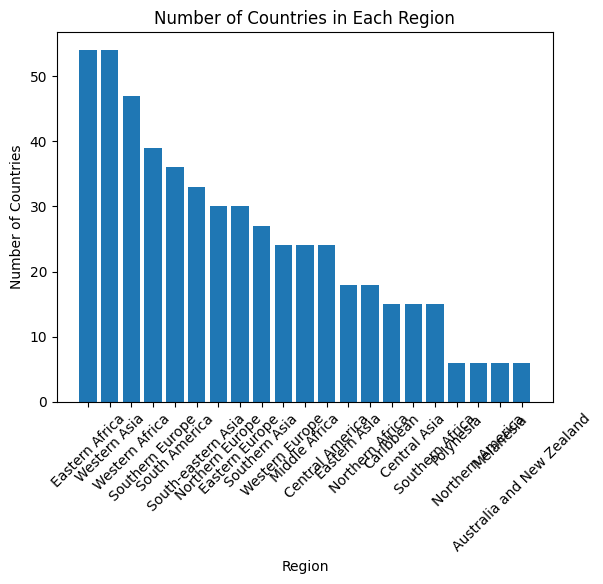

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df_sorted['anio'], df_sorted['indice'])
plt.xlabel('Year')
plt.ylabel('Index')
plt.title('Freedom of the Press Index Over Time')
plt.show()

plt.bar(df_merged['Region'].value_counts().index, df_merged['Region'].value_counts().values)
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.title('Number of Countries in Each Region')
plt.xticks(rotation=45)
plt.show()



📰 Filtrar américa del sur, analizar si en los ultimos años el indice de libertad de prensa mejoro o empeoro

In [65]:
df_south_america = df_merged[df_merged['Continente'] == 'América']

df_south_america = df_south_america.sort_values(by='anio')

df_south_america['diff'] = df_south_america['indice'].diff()

print('Diferencia en el índice de libertad de prensa en América del Sur:')
print(df_south_america[['anio', 'indice', 'diff']])

trend = df_south_america['diff'].mean()

print('Tendencia general del índice:', trend)

if trend > 0:
    print('El índice de libertad de prensa en América del Sur ha mejorado en los últimos años.')
else:
    print('El índice de libertad de prensa en América del Sur ha empeorado en los últimos años.')


Diferencia en el índice de libertad de prensa en América del Sur:
Empty DataFrame
Columns: [anio, indice, diff]
Index: []
Tendencia general del índice: nan
El índice de libertad de prensa en América del Sur ha empeorado en los últimos años.


📰 Crear una nueva columna llamada ``situacion`` en funcion del indice del pais

| Puntaje | Situación      |
|---------|----------------|
| 0-15    | Buena          |
| 15-30   | Mas bien buena |
| 30-45   | Problematica   |
| 45-60   | Dificil        |
| 60-100  | Muy grave      |


In [69]:
import pandas as pd
df_sorted['situacion'] = pd.cut(df_sorted['indice'], bins=[0, 15, 30, 45, 60, 100], labels=['Buena', 'Mas bien buena', 'Problematica', 'Dificil', 'Muy grave'])
print(df_sorted.head())


  codigo_iso       pais  anio  indice  ranking situacion
0        NOR    Noruega  2017    7.60      1.0     Buena
1        NOR    Noruega  2018    7.63      1.0     Buena
2        NOR    Noruega  2019    7.82      1.0     Buena
3        FIN  Finlandia  2019    7.90      2.0     Buena
4        SWE     Suecia  2017    8.27      2.0     Buena


📰 Que region tiene la mayor cantidad de situaciones buenas o mas bien buenas?

In [70]:
df_situacion = df_merged[df_merged['situacion'].isin(['Buena', 'Mas bien buena'])]
df_situacion_por_region = df_situacion['Region'].value_counts().reset_index()

df_situacion_por_region = df_situacion_por_region.sort_values(by='Region', ascending=False)

best_region = df_situacion_por_region.iloc[0]['Region']

print('La región con la mayor cantidad de situaciones buenas o más bien buenas es:', best_region)


La región con la mayor cantidad de situaciones buenas o más bien buenas es: Western Europe


📰  Ejercicio libre: asi como vinimos haciendo hasta este punto, genera informacion interesante sobre estos datos (al menos 2 datos/graficos interesantes)